In [2]:
#em andamento
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('VideoGameUsage_Profile.csv')
df.head(5)


,Age,Gender,student,play_video_game,favorite_game,most_played_game,reason_of_play_game
0,22,Male,Yes,Yes,FIFA 22,FIFA 22,competition
1,21,Male,Yes,Yes,Call of Duty,Call of Duty,entertainment
2,23,Male,Yes,Yes,GTA Vice City,GTA Vice City,entertainment
3,23,Male,Yes,sometimes,pubg,pubg,entertainment
4,23,Male,Yes,Yes,pubg,pubg,entertainment


In [3]:
df.describe()

,Age
count,99.000000
mean,23.303030
std,1.281378
min,21.000000
25%,23.000000
50%,23.000000
75%,24.000000
max,27.000000


<Axes: ylabel='Age'>

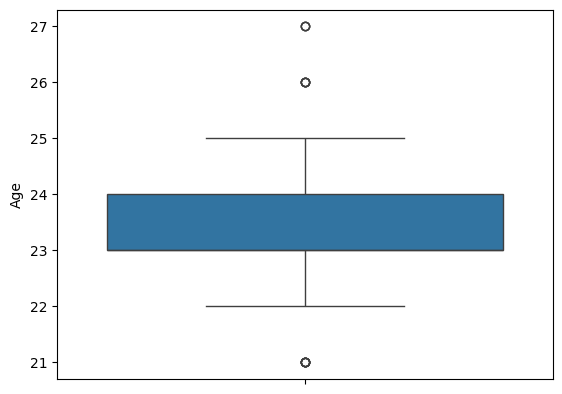

In [14]:
sns.boxplot(df['Age'])

In [4]:
df.isnull().sum()

Age                    0
Gender                 0
student                0
play_video_game        0
favorite_game          0
most_played_game       0
reason_of_play_game    0
dtype: int64

Informações Pessoas

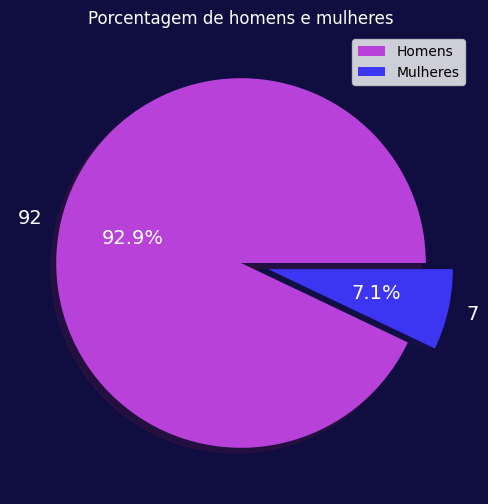

In [5]:
homens, mulheres = df['Gender'].value_counts()
fonte = {'fontsize':14, 'color': 'white'}
plt.figure(figsize=(10,6))
plt.pie([homens,mulheres], explode= (0,0.15),autopct='%1.1f%%', shadow='True', textprops= fonte, colors= ['#B841D9','#3C35F2'], labels= [homens,mulheres])
plt.title('Porcentagem de homens e mulheres', color='white')
plt.legend(['Homens','Mulheres'])
plt.gcf().set_facecolor('#100E40')
plt.show()

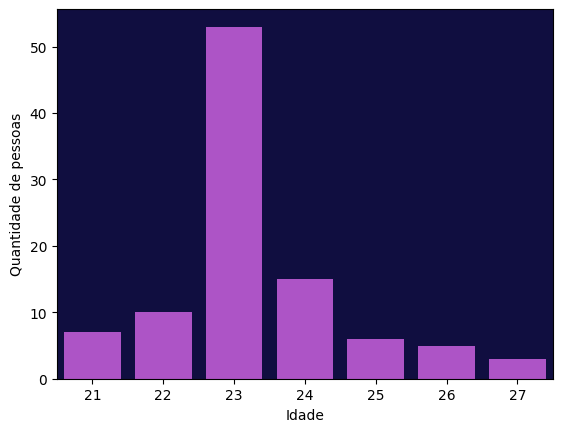

In [6]:
#distribuição das idades
sns.barplot(df['Age'].value_counts(), color = '#B841D9')
plt.gca().set_facecolor('#100E40')
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')

plt.show()

Informações dos jogos

In [7]:
df['most_played_game'] = df['most_played_game'].replace('FIFA 22 ', 'FIFA 22', regex=True)
df['most_played_game']

0           FIFA 22
1      Call of Duty
2     GTA Vice City
3              pubg
4              pubg
          ...      
94        Minecraft
95        Minecraft
96        Minecraft
97             pubg
98             pubg
Name: most_played_game, Length: 99, dtype: object

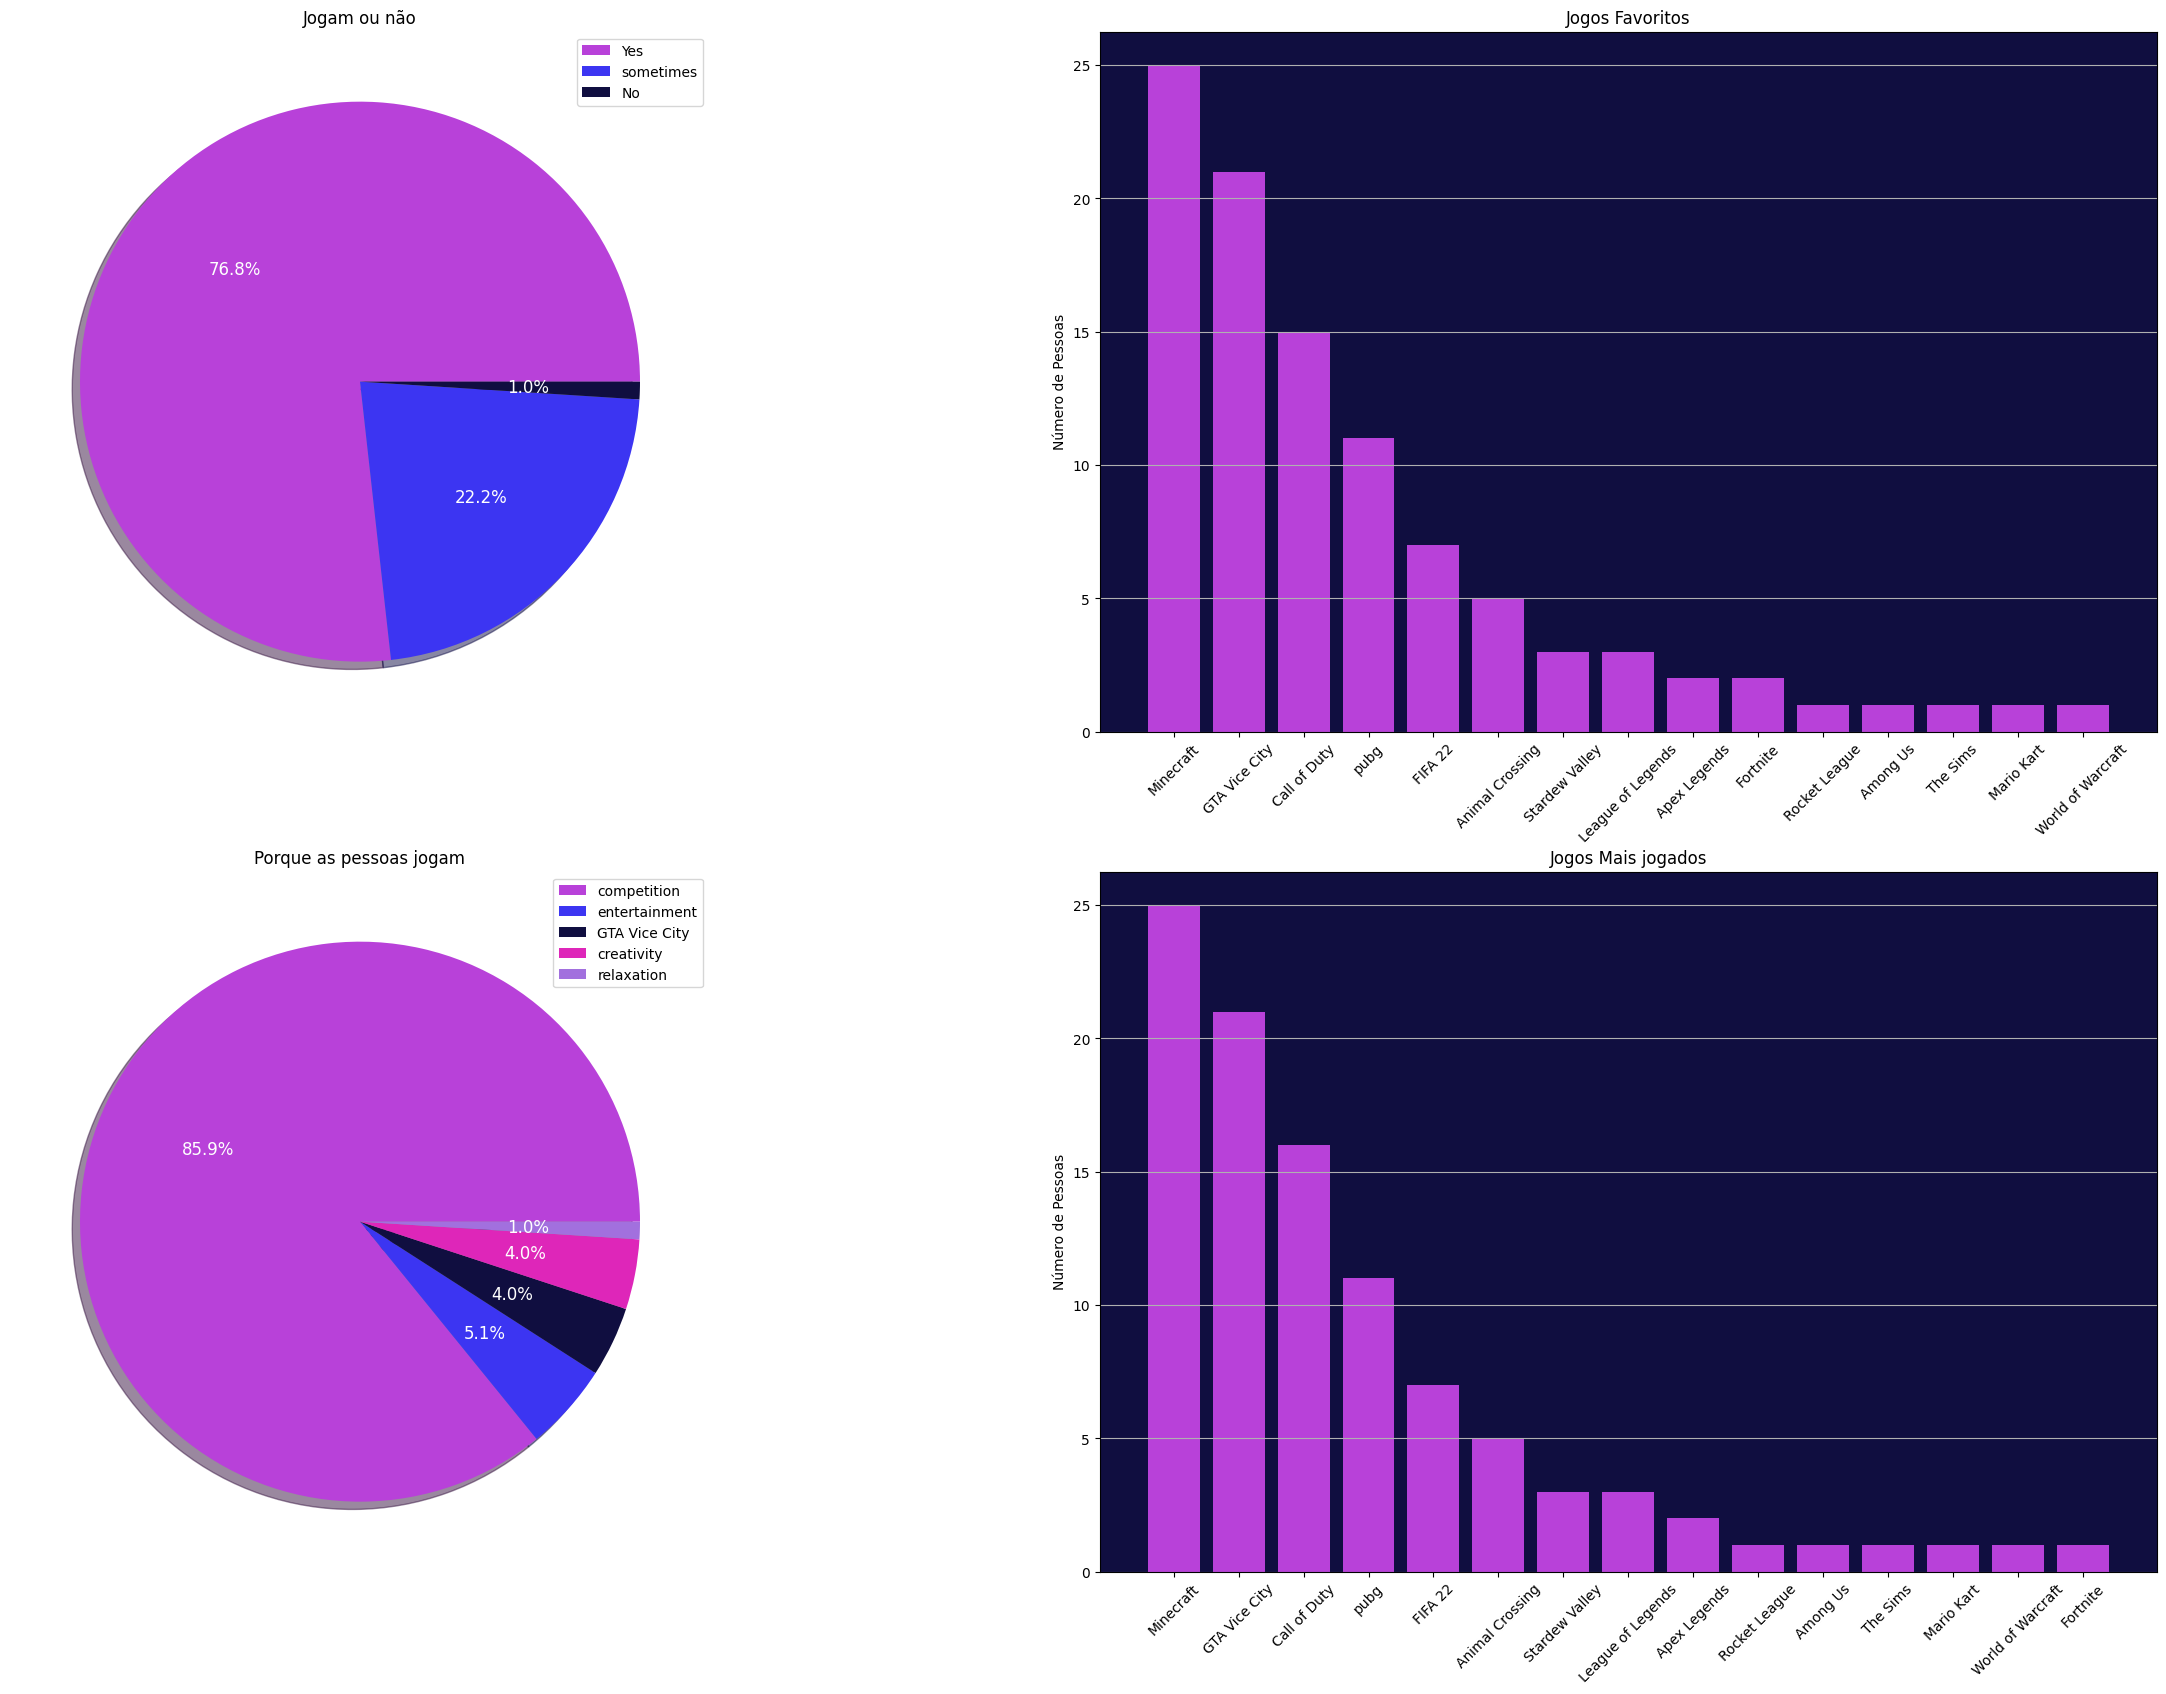

In [8]:
fig,ax = plt.subplots(2,2, figsize=(30,20))
ax[0,0].pie(df['play_video_game'].value_counts(),autopct='%1.1f%%', shadow='True', colors = ['#B841D9','#3C35F2','#100E40'], textprops={'color':'white', 'fontsize': 12})
ax[0,0].set_title('Jogam ou não')
ax[0,0].legend(list(df['play_video_game'].unique()))

ax[0,1].bar(df['favorite_game'].value_counts().keys(), df['favorite_game'].value_counts().values, color = '#B841D9')
ax[0,1].tick_params(axis='x', rotation=45)
ax[0,1].set_title('Jogos Favoritos')
ax[0,1].set_facecolor('#100E40')
ax[0,1].grid(axis='y')
ax[0,1].set_ylabel('Número de Pessoas')

ax[1,0].pie(df['reason_of_play_game'].value_counts(), autopct='%1.1f%%', shadow='True', colors = ['#B841D9','#3C35F2','#100E40','#DE26B9','#A270DE'], textprops={'color':'white', 'fontsize': 12})
ax[1,0].set_title('Porque as pessoas jogam')
ax[1,0].legend(list(df['reason_of_play_game'].unique()))

ax[1,1].bar(df['most_played_game'].value_counts().keys(), df['most_played_game'].value_counts().values, color ='#B841D9')
ax[1,1].tick_params(axis='x', rotation=45)
ax[1,1].set_title('Jogos Mais jogados')
ax[1,1].set_facecolor('#100E40')
ax[1,1].set_ylabel('Número de Pessoas')
ax[1,1].grid(axis='y')

plt.show()

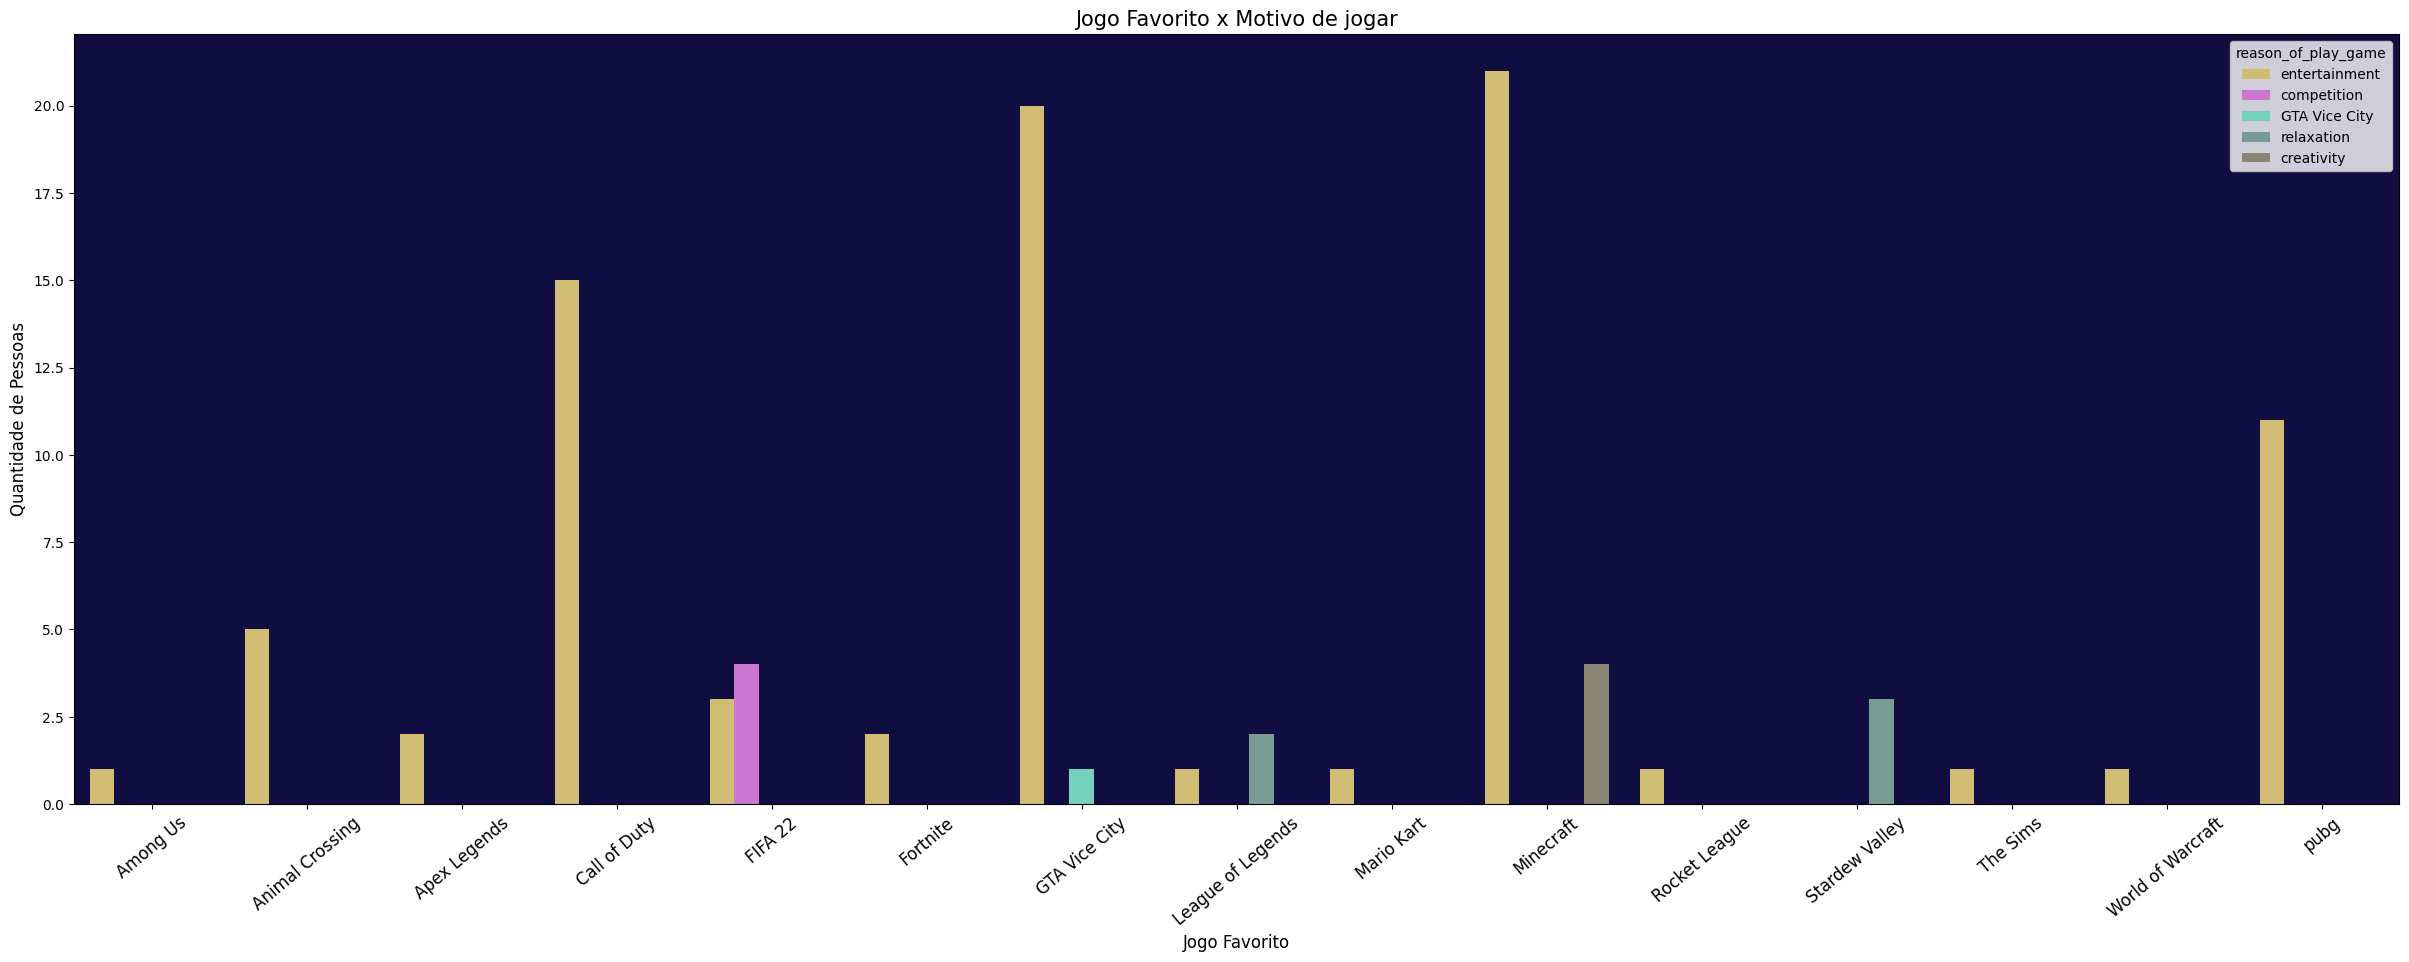

In [9]:
plt.figure(figsize=(30,10))
favorito_pqjogam = df.groupby('favorite_game')['reason_of_play_game'].value_counts()
sns.barplot( data= favorito_pqjogam.to_frame(), x = 'favorite_game', y ='count', hue ='reason_of_play_game', palette = ['#E0C467','#DA67E0','#67E0C8','#72A197','#8B856F']).set_title('Jogo Favorito x Motivo de jogar', fontsize=15)
plt.xticks( rotation=40, fontsize=12)
plt.xlabel('Jogo Favorito', fontsize=12)
plt.ylabel('Quantidade de Pessoas', fontsize=12)
plt.gca().set_facecolor('#100E40')

plt.show()


A maioria das pessoas jogam por entretenimento conforme visto anteriormente, entretanto alguns jogos fogem um pouco do padrão: 
-As pessoas que tem fifa 22 como jogo favorito, costumam jogar mais por competição.
-As pessoas que jogam lol costumam jogar mais com intuito de relaxar.
-As pessoas que jogam stardew valley jogam mais para relaxar também.
-Minecraft a maioria joga pela diversão, entretanto uma parcela joga principalmente pelo fator criatividade que o jogo proporciona.

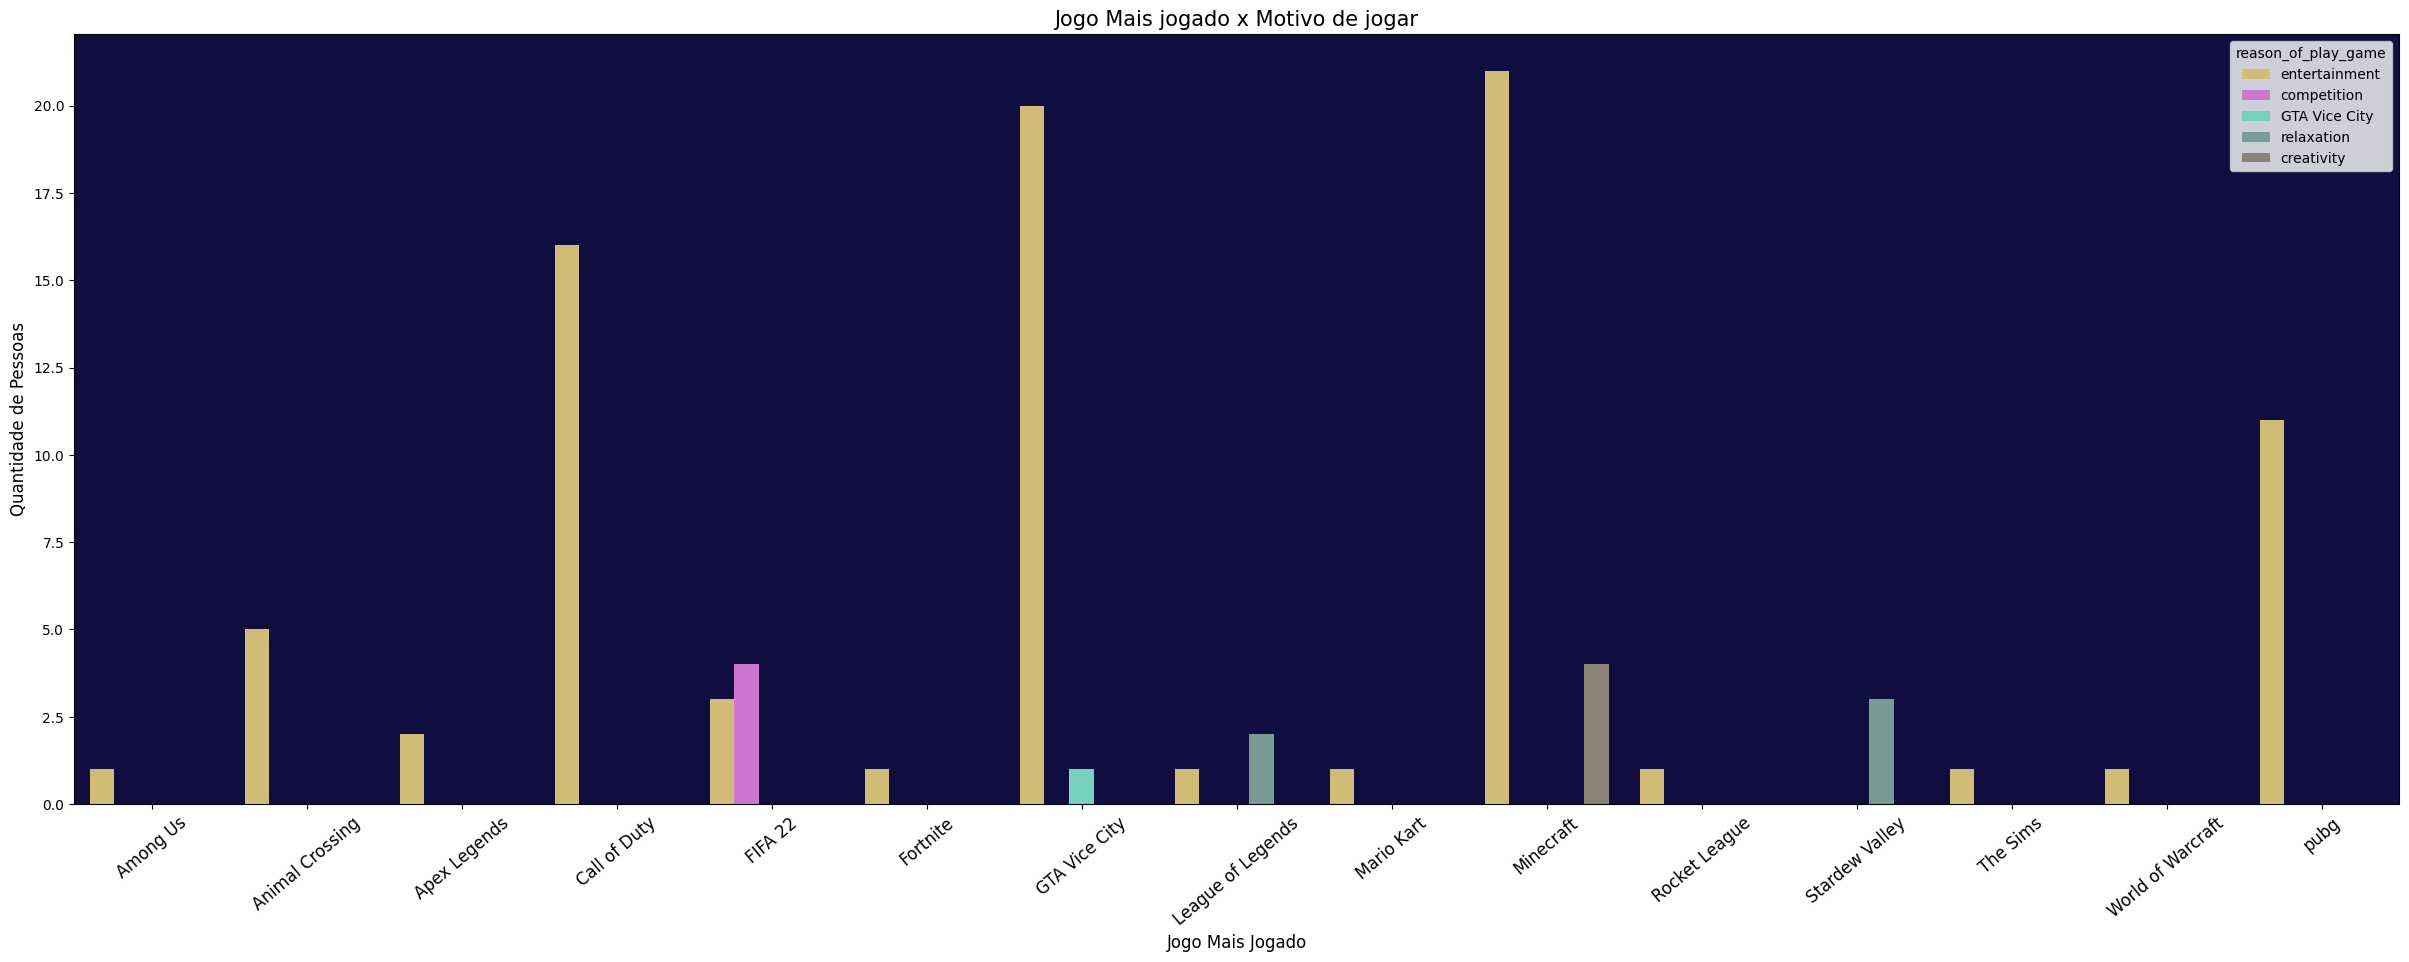

In [10]:
plt.figure(figsize=(30,10))
maisjogado_pqjogam = df.groupby('most_played_game')['reason_of_play_game'].value_counts()
sns.barplot( data= maisjogado_pqjogam.to_frame(), x = 'most_played_game', y ='count', hue ='reason_of_play_game', palette = ['#E0C467','#DA67E0','#67E0C8','#72A197','#8B856F']).set_title('Jogo Mais jogado x Motivo de jogar', fontsize=15)
plt.xticks( rotation=40, fontsize=12)
plt.xlabel('Jogo Mais Jogado', fontsize=12)
plt.ylabel('Quantidade de Pessoas', fontsize=12)
plt.gca().set_facecolor('#100E40')

plt.show()


nenhuma alteração relevante em relação ao jogo favorito

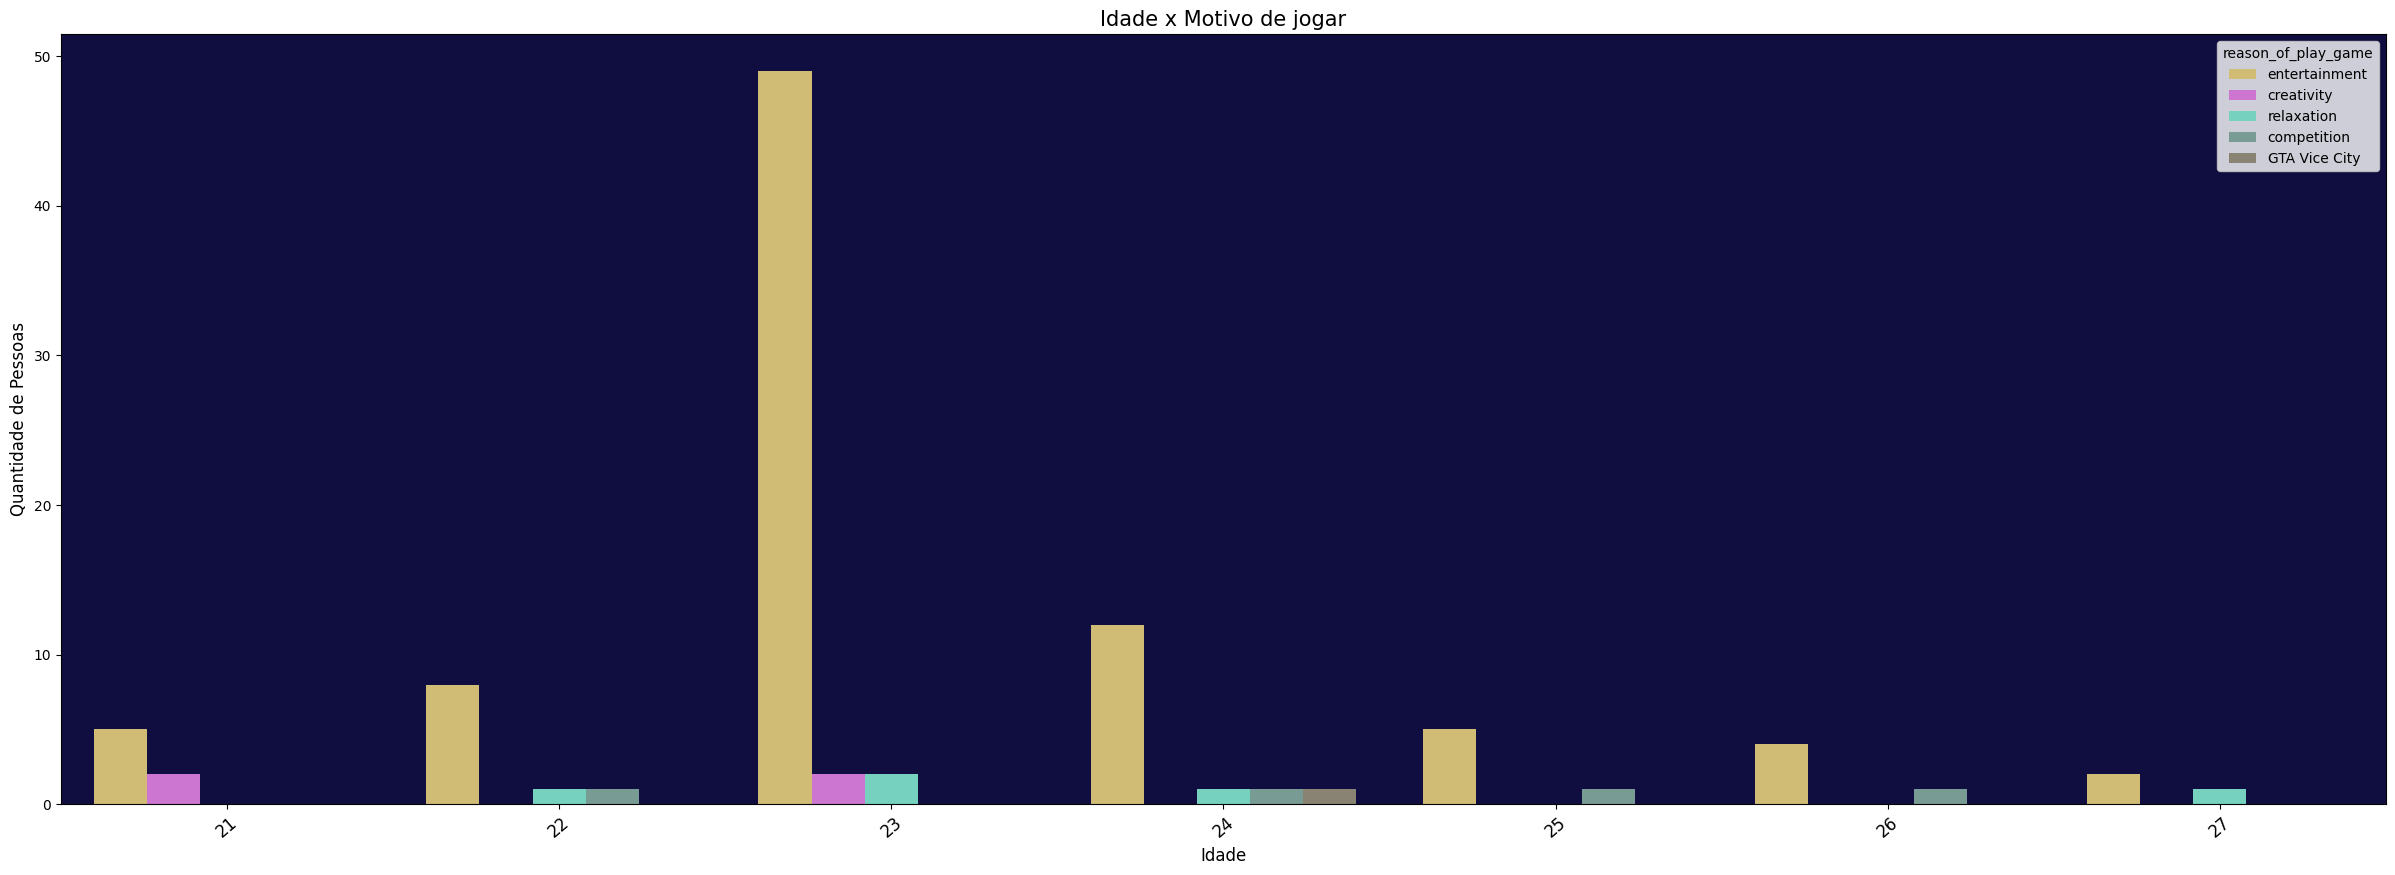

In [11]:
plt.figure(figsize=(30,10))
idade_pqjogam = df.groupby('Age')['reason_of_play_game'].value_counts()
sns.barplot( data= idade_pqjogam.to_frame(), x = 'Age', y ='count', hue ='reason_of_play_game', palette = ['#E0C467','#DA67E0','#67E0C8','#72A197','#8B856F']).set_title('Idade x Motivo de jogar', fontsize=15)
plt.xticks( rotation=40, fontsize=12)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Quantidade de Pessoas', fontsize=12)
plt.gca().set_facecolor('#100E40')


Com 23 anos a grande maioria das pessoas jogos por diversão, enquanto nas outras idades o motivo parece ser um pouco melhor distribuido, apesar do entretenimento continuar dominante.

In [12]:
df.head()

,Age,Gender,student,play_video_game,favorite_game,most_played_game,reason_of_play_game
0,22,Male,Yes,Yes,FIFA 22,FIFA 22,competition
1,21,Male,Yes,Yes,Call of Duty,Call of Duty,entertainment
2,23,Male,Yes,Yes,GTA Vice City,GTA Vice City,entertainment
3,23,Male,Yes,sometimes,pubg,pubg,entertainment
4,23,Male,Yes,Yes,pubg,pubg,entertainment


In [13]:
plt.figure(figsize=(30,10))
estudante_pqjoga = df.groupby(['favorite_game','Age'])['reason_of_play_game'].value_counts()
estudante_pqjoga.to_frame()

count
favorite_game     Age reason_of_play_game       
Among Us          23  entertainment            1
Animal Crossing   21  entertainment            1
                  23  entertainment            4
Apex Legends      21  entertainment            1
                  23  entertainment            1
Call of Duty      21  entertainment            1
                  22  entertainment            1
                  23  entertainment           11
                  25  entertainment            2
FIFA 22           22  competition              1
                  23  entertainment            2
                  24  competition              1
                  25  entertainment            1
                      competition              1
                  26  competition              1
Fortnite          23  entertainment            1
                  26  entertainment            1
GTA Vice City     21  entertainment            1
                  22  entertainment            1
                  23  entertainment            9
                  24  entertainment            6
                      GTA Vice City            1
                  25  entertainment            2
                  26  entertainment            1
League of Legends 22  relaxation               1
                  23  relaxation               1
                      entertainment            1
Mario Kart        23  entertainment            1
Minecraft         21  creativity               2
                      entertainment            1
                  22  entertainment            3
                  23  entertainment           11
                      creativity               2
                  24  entertainment            4
                  26  entertainment            1
                  27  entertainment            1
Rocket League     22  entertainment            1
Stardew Valley    23  relaxation               1
                  24  relaxation               1
                  27  relaxation               1
The Sims          23  entertainment            1
World of Warcraft 27  entertainment            1
pubg              22  entertainment            2
                  23  entertainment            6
                  24  entertainment            2
                  26  entertainment            1

<Figure size 3000x1000 with 0 Axes>